In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import json

In [3]:
from var_table import VarTable

In [4]:
var_table = VarTable()

In [5]:
group_name = 'G0'
experiments_count = 100
fitnesses_dataset = {}
durations_dataset = {}

In [6]:
def find_data_by_name(dataset, name):
    for data in dataset:
        data_name = data['name']
        if data_name == name:
            return data

In [7]:
def find_solution_by_config(solutions, config):
    for solution in solutions:
        solution_config = solution['config']
        if solution_config == config:
            return solution

In [8]:
def get_results(solver_name, config):
    fitnesses = []
    durations = []
    for experiment_number in range(1, experiments_count + 1):
        nested_directory = var_table.get_nested_directory(group_name, experiment_number)
        file_path = '{}/solutions.json'.format(nested_directory)
        file = open(file_path, 'r')
        content = file.read()
        dataset = json.loads(content)
        file.close()
        data = find_data_by_name(dataset, solver_name)
        solutions = data['solutions']
        solution = find_solution_by_config(solutions, config)
        result = solution['result']
        fitness = result['fitness']
        duration = result['duration']
        fitnesses.append(fitness)
        durations.append(duration)
    return fitnesses, durations

In [9]:
# configs

In [10]:
solver_config = {
    'k': 2
}

In [11]:
genetic_config = {
    'k': 2,
    'num_generations': 100,
    'sol_per_pop': 4,
    'num_parents_mating': 2,
    'parent_selection_type': 'sss',
    'keep_parents': 1,
    'crossover_type': 'scattered',
    'mutation_type': 'scramble',
    'mutation_percent_genes': 10
}

In [12]:
rl_config = {
    'k': 2,
    'total_timesteps': 100
}

In [13]:
# glpk
glpk_solver_name = 'glpk'
glpk_fitnesses, glpk_durations = get_results(glpk_solver_name, solver_config)

fitnesses_dataset[glpk_solver_name] = glpk_fitnesses
durations_dataset[glpk_solver_name] = glpk_durations

In [14]:
# xpress
xpress_solver_name = 'xpress'
xpress_fitnesses, xpress_durations = get_results(xpress_solver_name, solver_config)

fitnesses_dataset[xpress_solver_name] = xpress_fitnesses
durations_dataset[xpress_solver_name] = xpress_durations

In [15]:
# mpec_minlp
mpec_minlp_solver_name = 'mpec_minlp'
mpec_minlp_fitnesses, mpec_minlp_durations = get_results(mpec_minlp_solver_name, solver_config)

fitnesses_dataset[mpec_minlp_solver_name] = mpec_minlp_fitnesses
durations_dataset[mpec_minlp_solver_name] = mpec_minlp_durations

In [16]:
# ilogcp
ilogcp_solver_name = 'ilogcp'
ilogcp_fitnesses, ilogcp_durations = get_results(ilogcp_solver_name, solver_config)

fitnesses_dataset[ilogcp_solver_name] = ilogcp_fitnesses
durations_dataset[ilogcp_solver_name] = ilogcp_durations

In [17]:
# binary_genetic
binary_genetic_solver_name = 'binary_genetic'
binary_genetic_fitnesses, binary_genetic_durations = get_results(binary_genetic_solver_name, genetic_config)

fitnesses_dataset[binary_genetic_solver_name] = binary_genetic_fitnesses
durations_dataset[binary_genetic_solver_name] = binary_genetic_durations

In [18]:
# discrete_genetic
discrete_genetic_solver_name = 'discrete_genetic'
discrete_genetic_fitnesses, discrete_genetic_durations = get_results(discrete_genetic_solver_name, genetic_config)

fitnesses_dataset[discrete_genetic_solver_name] = discrete_genetic_fitnesses
durations_dataset[discrete_genetic_solver_name] = discrete_genetic_durations

In [19]:
# binary_rl_A2C
binary_rl_A2C_solver_name = 'binary_rl_A2C'
binary_rl_A2C_fitnesses, binary_rl_A2C_durations = get_results(binary_rl_A2C_solver_name, rl_config)

fitnesses_dataset[binary_rl_A2C_solver_name] = binary_rl_A2C_fitnesses
durations_dataset[binary_rl_A2C_solver_name] = binary_rl_A2C_durations

In [20]:
# binary_rl_PPO
binary_rl_PPO_solver_name = 'binary_rl_PPO'
binary_rl_PPO_fitnesses, binary_rl_PPO_durations = get_results(binary_rl_PPO_solver_name, rl_config)

fitnesses_dataset[binary_rl_PPO_solver_name] = binary_rl_PPO_fitnesses
durations_dataset[binary_rl_PPO_solver_name] = binary_rl_PPO_durations

In [21]:
# discrete_rl_A2C
discrete_rl_A2C_solver_name = 'discrete_rl_A2C'
discrete_rl_A2C_fitnesses, discrete_rl_A2C_durations = get_results(discrete_rl_A2C_solver_name, rl_config)

fitnesses_dataset[discrete_rl_A2C_solver_name] = discrete_rl_A2C_fitnesses
durations_dataset[discrete_rl_A2C_solver_name] = discrete_rl_A2C_durations

In [22]:
# discrete_rl_PPO
discrete_rl_PPO_solver_name = 'discrete_rl_PPO'
discrete_rl_PPO_fitnesses, discrete_rl_PPO_durations = get_results(discrete_rl_PPO_solver_name, rl_config)

fitnesses_dataset[discrete_rl_PPO_solver_name] = discrete_rl_PPO_fitnesses
durations_dataset[discrete_rl_PPO_solver_name] = discrete_rl_PPO_durations

In [23]:
# draw fitnesses
def draw_dataset(dataset, title, ylable):
    keys = list(dataset.keys())
    f_key = keys[0]
    f_value = dataset[f_key]
    length = len(f_value)
    x = range(length)
    for key in keys:
        y = dataset[key]
        plt.scatter(x, y, s=1, label=key)
        # plt.plot(x, y, label=key)
    plt.legend()
    plt.title(title)
    plt.xlabel('experiment')
    plt.ylabel(ylable)
    plt.show()

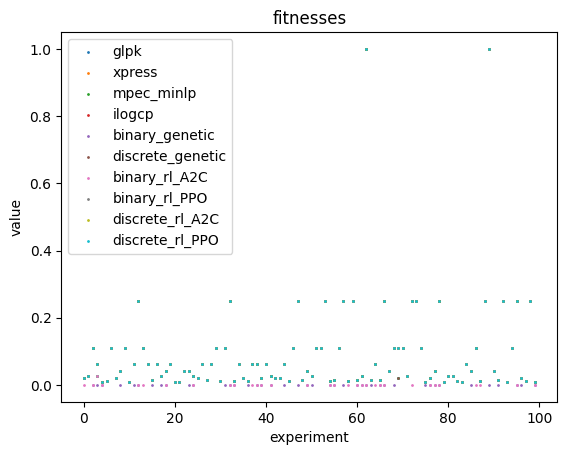

In [24]:
draw_dataset(fitnesses_dataset, 'fitnesses', 'value')

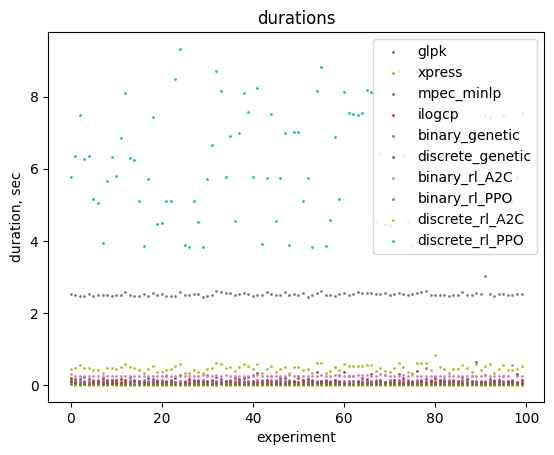

In [25]:
draw_dataset(durations_dataset, 'durations', 'duration, sec')

In [26]:
def draw_sns_dataset(dataset, title, ylabel):
    df = pd.DataFrame(dataset)
    df_melted = pd.melt(df)
    # sns.swarmplot(x="variable", y='value', hue="variable", data=df_melted)
    sns.jointplot(x="variable", y='value', data=df_melted)
    # sns.kdeplot(x="variable", y='value', data=df_melted).set(title=title)
    plt.xticks(rotation=75)
    plt.ylabel(ylabel)
    plt.xlabel('')

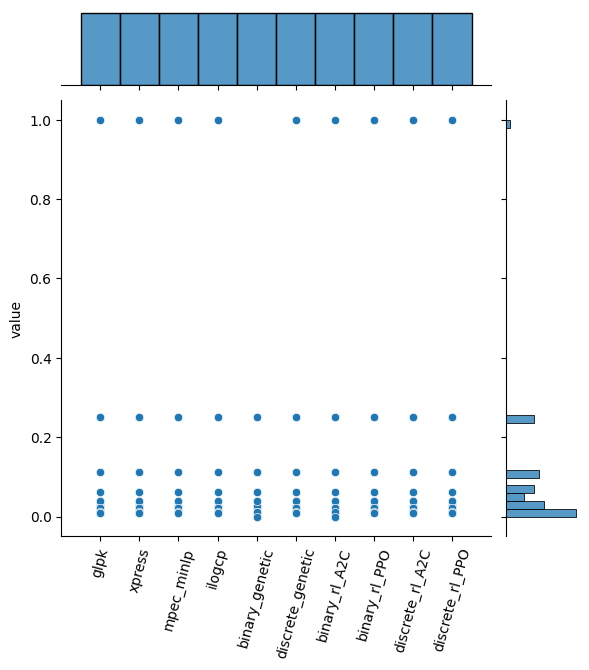

In [27]:
draw_sns_dataset(fitnesses_dataset, 'fitnesses', 'value')

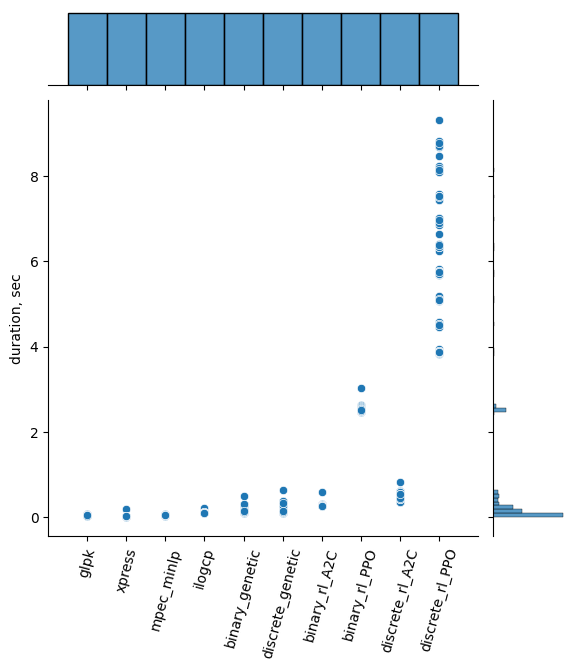

In [28]:
draw_sns_dataset(durations_dataset, 'durations', 'duration, sec')